**About the project**

A company's HR department wants to predict whether some Employee would leave the company in next 2 years. Your job is to build a predictive model that predicts the prospects of future and present employee.

**Loading the data**

When loading the data, there are 9 columns, according to the description attached to this database, each variable corresponds to the following:

**Education**: Education Level

**JoiningYear**: Year of joining company

**City**: Job Location

**PaymentTier**: 1-highest; 2-mid level; 3:lowest

**Age**: Current age of employee

**Gender**: Gender of employee

**EverBenched**: Ever keep out of the projects for 1 month or more

**ExperienceInCurrentDomain**: Experience in current field

**LeaveOrNot**: Whether employee leaves the company in next two years

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


employee = pd.read_csv('Employee.csv')
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


**Exploring the data**

In the table there are 4653 entries that mean the number of employee registration, where 5 of these are of type int and 4 of type object, also there are no missing values.

1889 duplicate data were found, but despite this, imagine a scenario where this data is not because a single employee has many records but there are several employees who had similar characteristics, then if so, these characteristics would represent an important pattern for the analysis.


In [2]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [3]:
employee.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [4]:
print(employee.duplicated().sum())


1889


In [5]:
employee.describe().round(0)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.0,4653.0,4653.0,4653.0,4653.0
mean,2015.0,3.0,29.0,3.0,0.0
std,2.0,1.0,5.0,2.0,0.0
min,2012.0,1.0,22.0,0.0,0.0
25%,2013.0,3.0,26.0,2.0,0.0
50%,2015.0,3.0,28.0,3.0,0.0
75%,2017.0,3.0,32.0,4.0,1.0
max,2018.0,3.0,41.0,7.0,1.0


**Focusing data exploration**

Taking into account that the objective is to predict if any client will leave the company within two years, it is identified that one of the most important columns is LeaveOrNot

With respect to this column it is found that, of total registrations (4,653): 
- There are 1,600 people who have left the company
- There are 3,053 employees

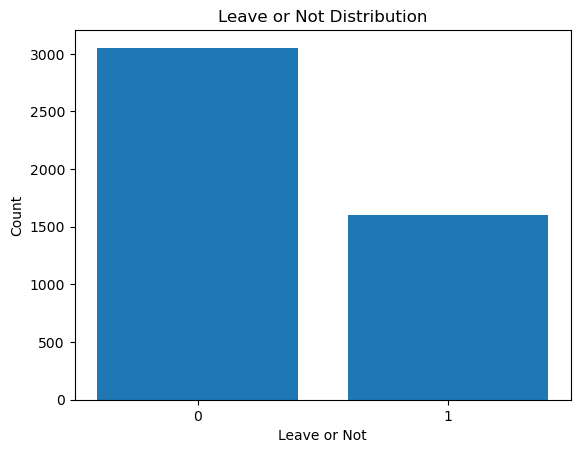

0    3053
1    1600
Name: LeaveOrNot, dtype: int64


In [6]:
leaveornot_counts = employee['LeaveOrNot'].value_counts()

plt.bar(leaveornot_counts.index, leaveornot_counts.values)  

plt.xticks(leaveornot_counts.index, 
           [str(leaveornot) for leaveornot in leaveornot_counts.index])

plt.xlabel('Leave or Not')
plt.ylabel('Count')
plt.title('Leave or Not Distribution')
plt.show()

print(leaveornot_counts)

Now emphasizing the LeaveOrNot variable, it can be seen in the following graph the following significant correlations
- A direct correlation with Joiningyear:0.18
- An inverse correlation with PaymentTier:-0.2

<AxesSubplot:>

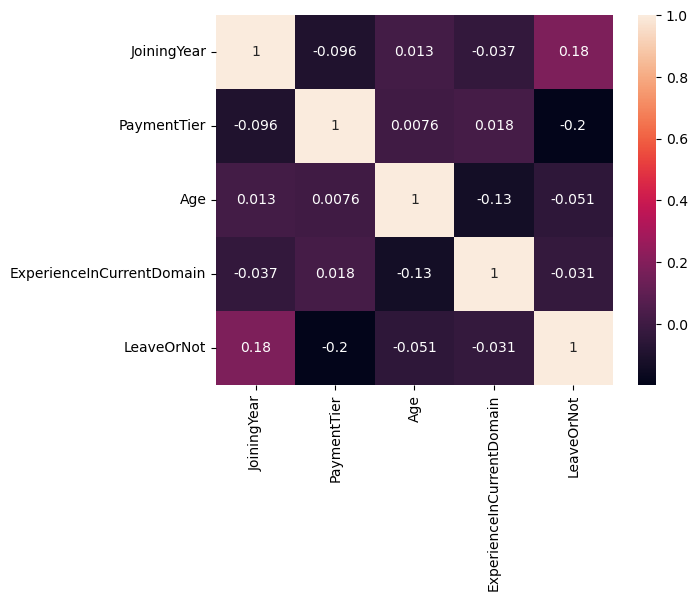

In [7]:
corr_matrix = employee.corr()
sns.heatmap(corr_matrix, annot=True)


The variable with which LeaveOrNot has a direct correlation is explored below, that is, JoningYear. Regarding JoiningYear it is found that
- 1108 employees joined the company in 2017
- 781 employees joined the company in 2015
- 699 employees joined the company in 2014
- 669 employees joined the company in 2013
- 525 employees joined the company in 2016
- 504 employees joined the company in 2012
- 367 employees joined the company in 2018

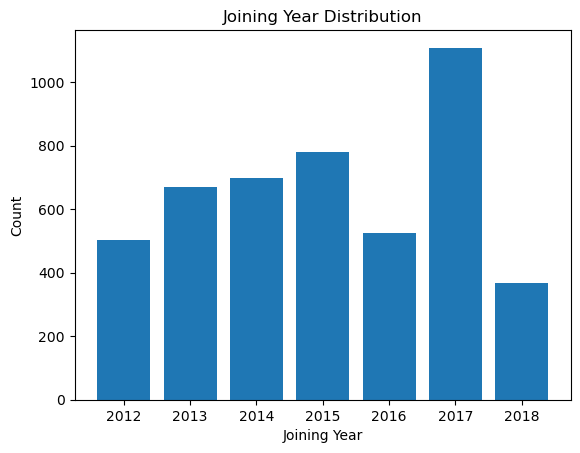

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64


In [8]:
joiningyear_counts = employee['JoiningYear'].value_counts()

plt.bar(joiningyear_counts.index, joiningyear_counts.values)  

plt.xticks(joiningyear_counts.index, [str(year) for year in joiningyear_counts.index])

plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.title('Joining Year Distribution')

plt.show()

print(joiningyear_counts)


You can see in the following graph the relationship between joiningYear and LeaveOrNot. It's found that among the most important values that

- 367 people who joined in 2018, after 2 years left their job
- 318 people who joined in 2015, after 2 years left their job
- 297 people who joined in 2017, after 2 years left their job

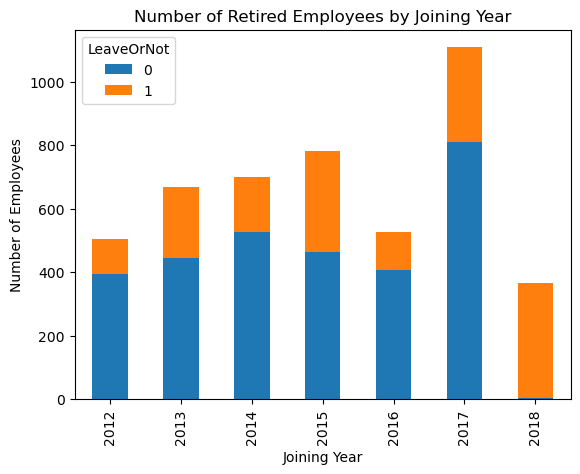

             LeaveOrNot
JoiningYear            
2012                109
2013                224
2014                173
2015                318
2016                117
2017                297
2018                362


In [9]:
grouped = employee.groupby(['JoiningYear', 'LeaveOrNot']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.set_xlabel('Joining Year')
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Retired Employees by Joining Year')
plt.show()

corr_YearLeave=employee.groupby(['JoiningYear'])[['LeaveOrNot']].sum()
print(corr_YearLeave)


Now, let's remember...
- In 2018, 367 people joined the company and of this total for this same year, 362 left the company within two years
- In 2015, 781 people joined the company and of this total for this same year, 318 left the company within two years
- In 2017, 1108 people joined the company and of this total for this same year, 297 left the company within two years


PaymentTier was another of the variables that correlated with LeaveOrNot, so the following is found
- 3492 people have a basic payment level-3
- 918 people have a medium payment level-2
- 243 people have a high payment level-1

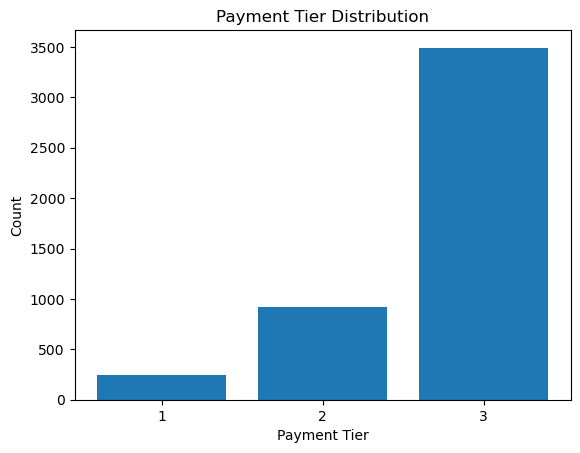

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64


In [10]:
payment_counts = employee['PaymentTier'].value_counts()

plt.bar(payment_counts.index, payment_counts.values)  

plt.xticks(payment_counts.index, [str(payment) for payment in payment_counts.index])
plt.xlabel('Payment Tier')
plt.ylabel('Count')
plt.title('Payment Tier Distribution')

plt.show()
print(payment_counts)


The paymentTier and LeaveOrNot data is shown below. It is found that
- 961 people receiving basic pay left the company within 2 years
- 550 people receiving basic pay left the company within 2 years
- 89 people receiving basic pay left the company within 2 years


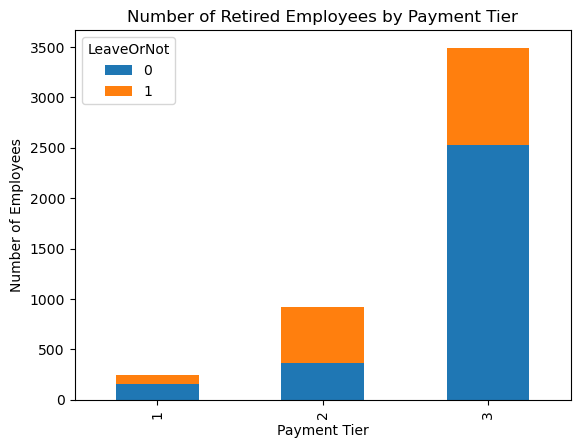

             LeaveOrNot
PaymentTier            
1                    89
2                   550
3                   961


In [11]:
grouped = employee.groupby(['PaymentTier', 'LeaveOrNot']).size().unstack()
ax = grouped.plot(kind='bar', stacked=True)
ax.set_xlabel('Payment Tier')
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Retired Employees by Payment Tier')
plt.show()

corr_paymentLeave=employee.groupby(['PaymentTier'])[['LeaveOrNot']].sum()
print(corr_paymentLeave)

Now let's remember...
- Of 3942 registered people receiving a basic salary, 961 retired within two years, then the drop rate is 24.37%
- Of 918 registered people receiving a medium salary, 550 retired within two years,then the drop rate is 59.91%
- Of 243 registered people receiving a high salary, 89 retired within two years, then the drop rate is 36.62%

In [12]:
totalEmployee_BS = 3942
dropoutEmployee_BS = 961
dropout_rateBS = (dropoutEmployee_BS / totalEmployee_BS) * 100

totalEmployee_MS = 918
dropoutEmployee_MS = 550
dropout_rateMS = (dropoutEmployee_MS / totalEmployee_MS) * 100

totalEmployee_HS = 243
dropoutEmployee_HS = 89
dropout_rateHS = (dropoutEmployee_HS / totalEmployee_HS) * 100

print("the dropout rate for basic salary employees is:", dropout_rateBS, "%")
print("the dropout rate for medium salary employees is:", dropout_rateMS, "%")
print("the dropout rate for high salary employees is:", dropout_rateHS, "%")




the dropout rate for basic salary employees is: 24.378488077118213 %
the dropout rate for medium salary employees is: 59.912854030501094 %
the dropout rate for high salary employees is: 36.62551440329218 %


The variables that had a significant correlation with LeaveOrNo have been explored, now the relationship that LeaveOrNot not may have with Education, City, Gender and EverBenched

Education: The data and the graph indicate that there are 
- 3601 records of employees with a bachelor's degree.
- 873 records of employees with a master's degree.
- 179 records of employees with a PHD's degree.

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

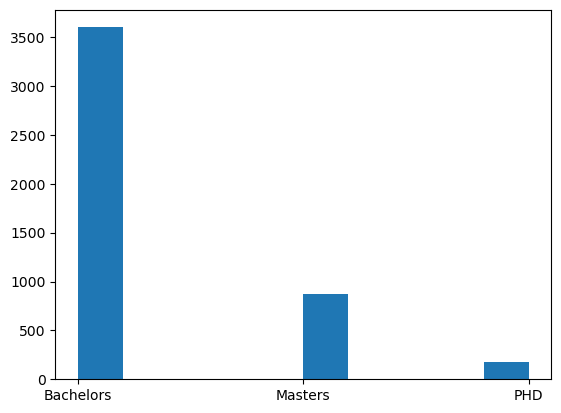

In [13]:
education_counts = employee['Education'].value_counts()
print(education_counts)

Edu = employee['Education']
plt.hist(Edu)
plt.show


According to the education graph in conjunction with leaveOrNot, it is found
- Of 1600 employees who retired within two years, 1129 have a bachelor's degree
- Of 1600 employees who retired within two years, 246 have a master's degree
- Of 1600 employees who retired within two years, 45 have a PHD degree

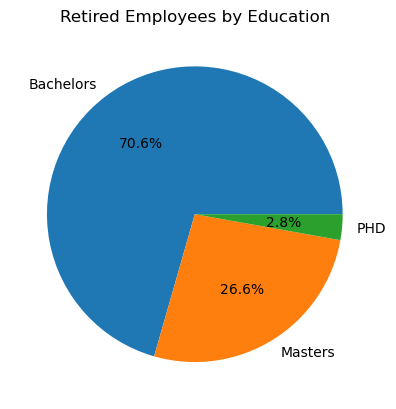

           LeaveOrNot
Education            
Bachelors        1129
Masters           426
PHD                45


In [14]:
retired_df = employee[employee['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('Education')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by Education')
plt.show()

corr_eduLeave=employee.groupby(['Education'])[['LeaveOrNot']].sum()
print(corr_eduLeave)



Now let's remember...
- Of 4653 records in total, 3601 employees have a bachelor's degree, and of this amount, 1129 left the company within 2 years. Dropout rate is: 31.35%
- Of 4653 records in total, 873 employees have a master's degree, and of this amount, 426 left the company within 2 years. Dropout rate is: 48.79%
- Of 4653 records in total, 179 employees have a PHD degree, and of this amount, 45 left the company within 2 years. Dropout rate is: 25.13%

In [15]:
totalLeave_B = 3601
dropoutLeave_B = 1129
dropout_rateB = (dropoutLeave_B / totalLeave_B) * 100

totalLeave_M = 873
dropoutLeave_M = 426
dropout_rateM = (dropoutLeave_M / totalLeave_M) * 100

totalLeave_P = 179
dropoutLeave_P = 45
dropout_rateP = (dropoutLeave_P / totalLeave_P) * 100

print("The bachelor's dropout rate is:", dropout_rateB, "%")
print("The master's dropout rate is:", dropout_rateM, "%")
print("The PHD's dropout rate is:", dropout_rateP, "%")


The bachelor's dropout rate is: 31.352402110524853 %
The master's dropout rate is: 48.797250859106526 %
The PHD's dropout rate is: 25.139664804469277 %


EverBenched:The data and the graph indicate that there are
- 478 employees have ever been off projects for 1 month or more
- 4175 employees were always in the projects

No     4175
Yes     478
Name: EverBenched, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

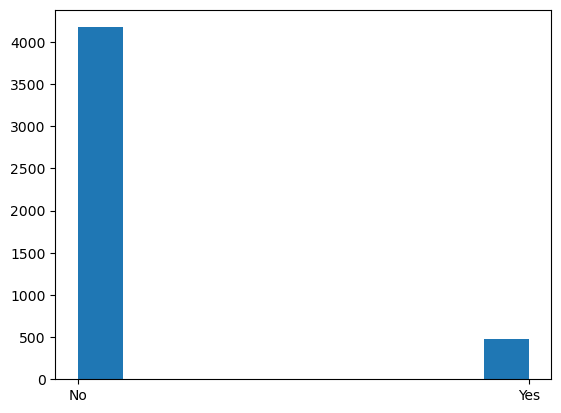

In [16]:
everbenched_counts = employee['EverBenched'].value_counts()
print(everbenched_counts)

everBenched = employee['EverBenched']
plt.hist(everBenched)
plt.show

According to the EverBenched graph in conjunction with leaveOrNot, it is found
- Of 1600 records of employees who left the company within 2 years, 1383 were employees who had always been in a project
- of 1,600 records of employees who left the company within 2 years, 217 were employees who had ever been away from projects

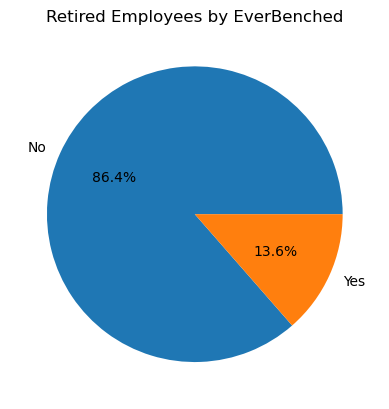

             LeaveOrNot
EverBenched            
No                 1383
Yes                 217


In [17]:
retired_df = employee[employee['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('EverBenched')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by EverBenched')
plt.show()

corr_everBenched=employee.groupby(['EverBenched'])[['LeaveOrNot']].sum()
print(corr_everBenched)

Now, let's remember...
- Of 478 employees who have ever been off projects for a month or more, 227 left the company within 2 years. The dropout rate is: 47.48%
- Of 4175 employee who had always been in project, 1383 left the company within 2 years.The dropout rate is: 33.12 %

In [18]:
totalLeave_EB = 478
dropoutLeave_EB = 227
dropout_rateEB = (dropoutLeave_EB / totalLeave_EB) * 100

totalLeave_NB = 4175
dropoutLeave_NB = 1383
dropout_rateNB = (dropoutLeave_NB / totalLeave_NB) * 100

print("Ever benched- The dropout rate is:", dropout_rateEB, "%")
print("Never benched- The dropout rate is:", dropout_rateNB, "%")


Ever benched- The dropout rate is: 47.48953974895397 %
Never benched- The dropout rate is: 33.125748502994014 %


Gender: The data and the graph indicate that there are 
- There are 2778 people identified as male
- Ther are 1875 people identify as female

Male      2778
Female    1875
Name: Gender, dtype: int64


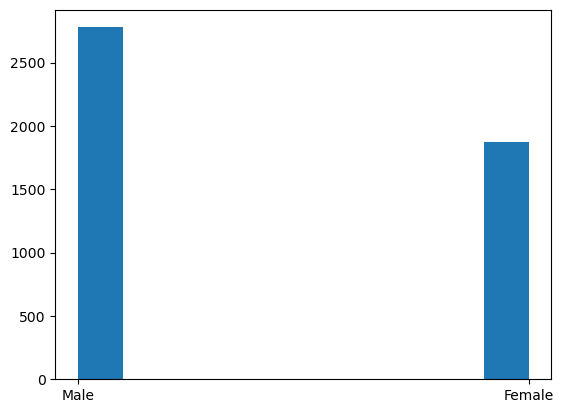

In [19]:
gender_counts = employee['Gender'].value_counts()
plt.hist(employee['Gender'])

plt.show
print(gender_counts)


According to the Gender graph in conjunction with leaveOrNot, it is found:
- There are 884 people indentify as female who left ther employe within 2 years
- There are 716 people indentify as male who left ther employe within 2 years

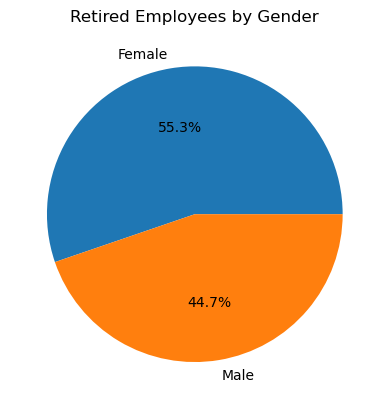

        LeaveOrNot
Gender            
Female         884
Male           716


In [20]:
retired_df = employee[employee['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('Gender')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by Gender')
plt.show()

corr_gender=employee.groupby(['Gender'])[['LeaveOrNot']].sum()
print(corr_gender)

Now let's remember...
- Of 2778 people identified as male, 716 left ther job within 2 years. The dropout rate is: 25.77 %
- Of 1875 people identified as female, 884 left ther job within 2 years. The dropout rate is: 47.14 %


In [21]:
totalLeave_M = 2778
dropoutLeave_M = 716
dropout_rateM = (dropoutLeave_M / totalLeave_M) * 100

totalLeave_F = 1875
dropoutLeave_F = 884
dropout_rateF = (dropoutLeave_F / totalLeave_F) * 100

print("Male- The dropout rate is:", dropout_rateM, "%")
print("Female- The dropout rate is:", dropout_rateF, "%")

Male- The dropout rate is: 25.7739380849532 %
Female- The dropout rate is: 47.14666666666666 %


City: The data and the graph indicate that there are
- 2228 people were located in Bangalore
- 1268 people were located in Pune
- 1157 people were located in New Delhi

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

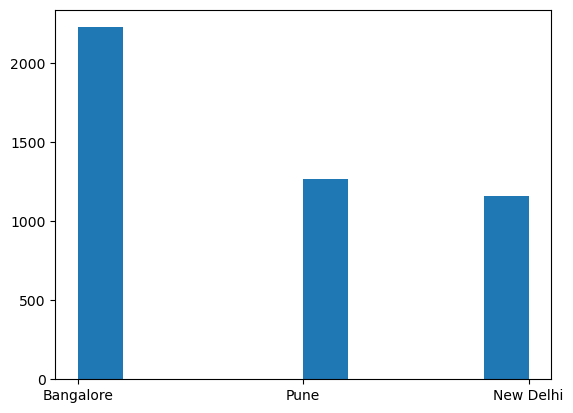

In [22]:
city_counts=employee['City'].value_counts()
print(city_counts)

graphic=employee['City']
plt.hist(graphic)
plt.show

According to the City graph in conjunction with leaveOrNot, it is found:
- Of 1600 people who left their job 639 were located in Pune
- Of 1600 people who left their job 595 were located in Bangalore
- Of 1600 people who left their job 366 were located in New Delhi

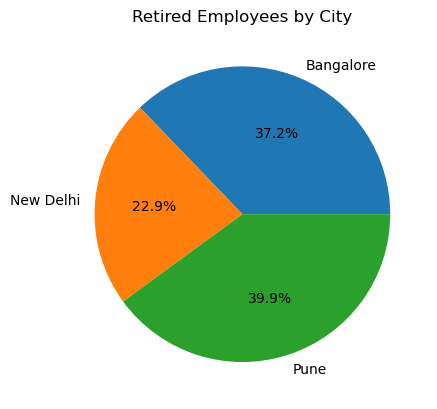

           LeaveOrNot
City                 
Bangalore         595
New Delhi         366
Pune              639


In [23]:
retired_df = employee[employee['LeaveOrNot'] == 1]

leave_counts = retired_df.groupby('City')['LeaveOrNot'].count()

plt.pie(leave_counts, labels=leave_counts.index, autopct='%1.1f%%')
plt.title('Retired Employees by City')
plt.show()

corr_city=employee.groupby(['City'])[['LeaveOrNot']].sum()
print(corr_city)

Now, let's remember...
- There are 2226 record of people who work in Bangalore, in that work location 595 left their job. The dropout rate is: 26.70 %
- There are 1268 record of people who work in Pune, in that work location 639 left their job. The dropout rate is: 50.39 %
- There are 1157 record of people who work in New Delhi, in that work location 366 left their job. The dropout rate is: 31.63 %

In [24]:
totalLeave_B = 2228
dropoutLeave_B = 595
dropout_rateB = (dropoutLeave_B / totalLeave_B) * 100

totalLeave_P = 1268
dropoutLeave_P = 639
dropout_rateP = (dropoutLeave_P / totalLeave_P) * 100

totalLeave_ND = 1157
dropoutLeave_ND = 366
dropout_rateND = (dropoutLeave_ND / totalLeave_ND) * 100

print("Bangalore- The dropout rate is:", dropout_rateB, "%")
print("Pune- The dropout rate is:", dropout_rateP, "%")
print("New- Delhi- The dropout rate is:", dropout_rateND, "%")

Bangalore- The dropout rate is: 26.705565529622984 %
Pune- The dropout rate is: 50.39432176656151 %
New- Delhi- The dropout rate is: 31.633535004321523 %


More correlations will be explored.

In this case, it is found that
- In Pune there are more women than men who after a period of 2 years left their job
- In New Delhi there are more women than men who after a period of 2 years left their job
- In Bangalore there are more men than women who after a period of 2 years left their job

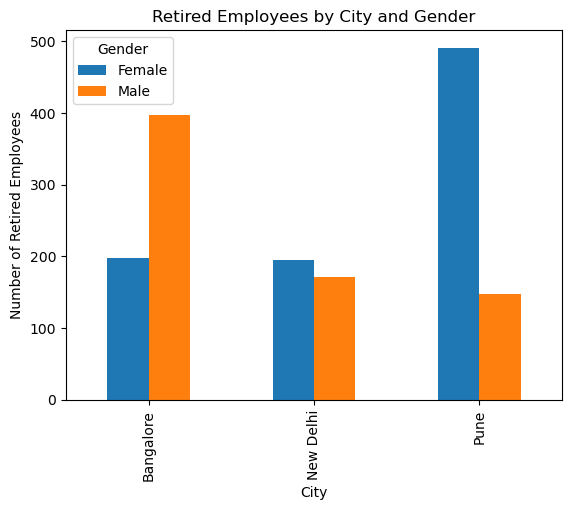

                             LeaveOrNot
City      Gender LeaveOrNot            
Bangalore Female 0                  461
                 1                  198
          Male   0                 1172
                 1                  397
New Delhi Female 0                  425
                 1                  195
          Male   0                  366
                 1                  171
Pune      Female 0                  105
                 1                  491
          Male   0                  524
                 1                  148
In Bangalore the percentage of men who resigned is: 28.54%
In Bangalore the percentage of women who resigned is: 30.05%
In New Delhi the percentage of men who resigned is: 31.84%
In New Delhi the percentage of women who resigned is: 31.45%
In Pune the percentage of men who resigned is: 22.02%
In Pune the percentage of women who resigned is: 82.38%


In [25]:
corr = employee.groupby(['City', 'Gender', 'LeaveOrNot'])[['LeaveOrNot']].count()
retired_df = employee[employee['LeaveOrNot'] == 1]
leave_counts = retired_df.groupby(['City', 'Gender'])['LeaveOrNot'].count()

leave_counts.unstack().plot(kind='bar')
plt.title('Retired Employees by City and Gender')
plt.xlabel('City')
plt.ylabel('Number of Retired Employees')
plt.show()

print(corr)

percentageBM = (391 / 1370) * 100
percentageBF = (198 / 659) * 100
percentageNM = (171 / 537) * 100
percentageNF = (195 / 620) * 100
percentagePM = (148 / 672) * 100
percentagePF = (491 / 596) * 100


print(f"In Bangalore the percentage of men who resigned is: {percentageBM:.2f}%")
print(f"In Bangalore the percentage of women who resigned is: {percentageBF:.2f}%")
print(f"In New Delhi the percentage of men who resigned is: {percentageNM:.2f}%")
print(f"In New Delhi the percentage of women who resigned is: {percentageNF:.2f}%")
print(f"In Pune the percentage of men who resigned is: {percentagePM:.2f}%")
print(f"In Pune the percentage of women who resigned is: {percentagePF:.2f}%")

*Surely there are more interesting relationships if you delve deeper, With this exploration the following is analyzed*

**Analyzing data**


There are 1,600 people out of 4,653 who within 2 years left their job, those who have an average salary represent 59.91%, on the contrary, people who have a basic salary represent only 24%. In contrast, the people who joined the company in 2018 and 2015 were the ones who left their jobs within two years.

In the company, the majority of employees have a bachelor's degree, followed by a master's degree and a PHD, however, it is shown that of the total master's degree, 49.91% will leave the company, while people with PHD have 25.13% and bachelor's degrees 31.35%. Emphasizing, of 4,653 employees, 873 are registered as masters. Now, of 1,600 who left the company, 426 were masters and 255 received a basic salary.

In the company, it is not usual for employees to be left out of a project, since there are 4,175 people out of 4,653 who have always been in a project. However, of the 1,600 people who left the company, 47.48% of people had been out of the project

It is identified that there are more males than females in the company, but of the 1,600 who have left the company, 55.3% are women.

In Bangalore there is the largest number of employees, followed by Pune and New Delhi, but it is in Pune where the most leave the company, since of the total number of employees in this place, 50.39% end up retiring within two years

**Analysis by city**

In Bangalore there are more men among the total number of women, the percentage of retirement is 30% while among the population of men it is 28.54%. In this way you can understand that women desert more in Bangalore, however, in this branch 67% are men.

In New Delhi, the majority of people who leave the company within 2 years are men and it is the branch where fewer people of this gender work: 171 people out of 366 of this gender retire, this represents a percentage of 31.84%. Regarding women: 195 of 425, that is, 31.45% retire. The percentages are almost the same

In Pune, 82.38% of women who work in the company retire within 2 years and this population represents 47.03% of the total number of employees.

It can be seen then that in Pune women represent a significant number, but it is the branch where the most women leave the company within a period of 2 years. In Bangalore, women are also the ones who leave the company the most, there are more men who work in that location and that is why the graph indicates a higher peak in them. Finally, in New Delhi it is where the number of female and male workers is almost the same and in the same way the retirement percentage for each of the genders is the same case.




**Conclusions**

For the conclusions, the characteristics of the people most likely to retire within a period of 2 years after joining the company are presented below.

   **Customers would leave the company in next 2 years:**
   - Women
   - Located in Pune
   - Ever keep out of the projects for 1 month or more
   - Master's degree with medium salary
   - Join the company in the year 2018
   
**Customers who would not leave the company in next 2 years:**
   - Men
   - Located in Bangalore
   - Always be within the company's projects
   - PHD and bachelor's degree
   - Bachelor's with basic salary
   - PHD with high salary
